In [34]:
import numpy as np
import pandas as pd
import random as rd
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
import math

In [35]:
k = 2
x = np.linspace(0,((2*k*np.pi)/1.5),1000)

In [36]:
def fx(x):
    return x + 2*np.sin(1.5*x)

In [37]:
def find(x,y):
    ones = np.ones(len(x)).transpose()
    X = np.vstack((ones, x))
    X = X.transpose()
    x1 = np.matmul(X.transpose(), X)
    x1 = np.linalg.pinv(x1)
    x1 = np.matmul(x1, X.transpose())
    y = y.reshape((1000, 1))
    x1 = np.matmul(x1, y)
    return x1

In [39]:
mu = 0 
sigma = 2
samples = 1000
y_true_data = fx(x)
y_true_data = y_true_data.reshape(samples,1)
yhat = np.zeros(samples)
fhat = []
var = np.zeros([samples,1])
mse = np.zeros([samples,1])
for i in range(samples):
    noise = np.random.normal(mu,sigma,samples)
    theta = np.zeros([2,1])
    noise = noise.reshape(samples,1)
    y = y_true_data + noise
    theta = find(x,y)
    u = (theta[0] + theta[1]*x)
    mse[i] = np.mean((y_true_data - u.reshape(samples,1))**2)
    fhat.append(u)-
    yhat = yhat + u
yhat = yhat/samples
bias = np.abs(y_true_data - yhat.reshape(samples,1))

for i in range(samples):
    var[i] = np.mean((fhat[i] - yhat)**2)
    
print("Bias =", np.mean(bias))
print("Variance = ",np.mean(var))
print("MSE = ",np.mean(mse))
print("Bias^{2} + Variance = ",np.mean(bias**2)+np.mean(var))

Bias = 1.1227311984713613
Variance =  0.00808933870543793
MSE =  1.703348809535921
Bias^{2} + Variance =  1.7033488095359206


In [31]:
def find(x,y):
    ones = np.ones(len(x)).transpose(
    X = np.vstack((np.vstack((np.vstack((np.vstack((ones, x)),x**2)),x**3)),x**(5/2)))
    X = X.transpose()
    x1 = np.matmul(X.transpose(), X)
    x1 = np.linalg.pinv(x1)
    x1 = np.matmul(x1, X.transpose())
    y = y.reshape((1000, 1))
    x1 = np.matmul(x1, y)
    return x1

In [32]:
mu = 0 
sigma = 2
samples = 1000
yhat = np.zeros(samples)
theta = np.zeros([1000,5,1])
fhat = []
var = np.zeros([samples,1])
mse = np.zeros([samples,1])
for i in range(samples):
    noise = np.random.normal(mu,sigma,samples)
    noise = noise.reshape(samples,1)
    y = y_true_data + noise
    theta[i] = find(x,y)
    u = (theta[i][0] + theta[i][1]*x + theta[i][2]*x**2 + theta[i][3]*x**3 +theta[i][4]*x**(5/2))
    mse[i] = np.mean((y_true_data - u.reshape(samples,1))**2)
    fhat.append(u)
    yhat = yhat + u
yhat = yhat/samples
bias = np.abs(y_true_data - yhat.reshape(samples,1))

for i in range(samples):
    var[i] = np.mean((fhat[i] - yhat)**2)
    
print("Bias =", np.mean(bias))
print("Variance = ",np.mean(var))
print("MSE = ",np.mean(mse))
print("Bias^{2} + Variance = ",np.mean(bias**2)+np.mean(var))

Bias = 1.0397928536427412
Variance =  0.019917970282620587
MSE =  1.4052706342349834
Bias^{2} + Variance =  1.4052706342349834


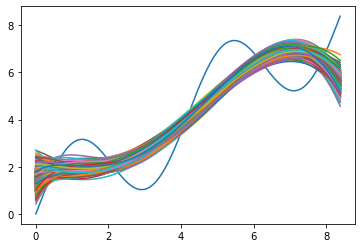

In [19]:
plt.plot(x,y_true_data)
for i in range(samples):
    plt.plot(x,theta[i][0] + theta[i][1]*x + theta[i][2]*x**2 + theta[i][3]*x**3 + theta[i][4]*x**(5/2))
plt.show()